<hr>

스터디 카페의 매출 추세나 음료와 음식별 판매금액 같은 내용을 전혀 모르고 있어요.

앞으로 '모두카페'가 더 잘되기 위한 운영 전략을 제시해주셨으면 해요.

<hr>

- entry_data：'모두 스터디카페'의 시간별 입장 기록 데이터

- sales_data：'모두 스터디카페'의 시간별 음식/음료 판매 데이터

- item_data：'모두 스터디카페'에서 판매하고 있는 음식/음료 종류와 가격

- item_entry_data：'모두 스터디카페'에서 판매하고 있는 입장권 종류와 가격

<hr>

아래 내용에 대한 시각화는 꼭 포함

- 월별 매출액 추세

- 가장 인기있는 음식/음료

- 가장 많이 팔린 입장권 종류

<hr>

# 3. 데이터 분석

## 3-1 데이터 불러오기

In [1]:
# 필요 라이브러리 호출하기
# Pandas, Numpy, Matplotlib, Seaborn을 호출해봅니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('default')
import seaborn as sns

In [2]:
# 데이터 호출하기
# entry_data.csv, sales_data.csv, item_data.csv, item_entry_data.csv의
# 총 네 가지 파일을 각각 호출합니다.
# 파일들은 본 클라우드에 저장되어있어 다음을 참고하여 호출해주세요.
# entry_data = pd.read_csv('~/aiffel/data_analysis_basic/data/entry_data.csv')

entry_data = pd.read_csv('./aiffel/data_analysis_basic/data/entry_data.csv')
sales_data = pd.read_csv('./aiffel/data_analysis_basic/data/sales_data.csv')
item_data = pd.read_csv('./aiffel/data_analysis_basic/data/item_data.csv')
item_entry = pd.read_csv('./aiffel/data_analysis_basic/data/item_entry_data.csv')


In [3]:
entry_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22555 entries, 0 to 22554
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   요금제명    22292 non-null  object
 1   입실      22555 non-null  object
 2   퇴실      22555 non-null  object
 3   이용      22533 non-null  object
 4   위치      22555 non-null  object
 5   금액      22555 non-null  int64 
 6   구분      22555 non-null  object
 7   고객      22555 non-null  object
dtypes: int64(1), object(7)
memory usage: 1.4+ MB


In [4]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   결제일시    7105 non-null   object
 1   판매위치    7105 non-null   object
 2   상품명     7105 non-null   object
 3   결제방식    7105 non-null   object
 4   비고      7105 non-null   object
 5   판매수량    7105 non-null   int64 
 6   결제금액    7105 non-null   object
 7   고객      6300 non-null   object
dtypes: int64(1), object(7)
memory usage: 444.2+ KB


In [5]:
item_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      174 non-null    int64 
 1   분류      174 non-null    object
 2   상품명     174 non-null    object
 3   판매금액    174 non-null    object
dtypes: int64(1), object(3)
memory usage: 5.6+ KB


In [6]:
item_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      34 non-null     int64 
 1   분류      34 non-null     object
 2   상품명     34 non-null     object
 3   판매금액    34 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.2+ KB


## 3-2 데이터 분석하기

- 필수 문제1 : 월별 매출액 추세(sales_data를 이용합니다.)<br>
월별 매출액 추세를 집계하고 그 결과를 시각화해봅니다.<br>
힌트: groupby() 함수를 사용하세요.


In [7]:
# 활용할 데이터(sales_data)를 temp_var로 정의하기
temp_var = sales_data.copy()
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507
...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN


In [8]:
# temp_var의 date열을 만들고, sales_date의 결제일시 중 앞에서 7번째 값까지 할당
temp_var['date'] = sales_data['결제일시'].str[:7]
temp_var

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04
...,...,...,...,...,...,...,...,...,...
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02


결제금액에는 쉼표(,)가 들어있어서 현재 문자열로 인식되고 있어요.<br>
따라서 쉼표를 지우고, 문자열을 숫자료 바꿔줘야합니다.

In [9]:
temp_var["payment"] = sales_data['결제금액'].str.replace(",", "").astype(int)
temp_var.tail()

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
7100,2021-02-17 14:21,카운터,아메리카노(HOT),현금,결제취소,-1,"-3,500",NaN,2021-02,-3500
7101,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,결제완료,1,"4,500",NaN,2021-02,4500
7102,2021-02-17 13:51,선불기2,카페모카(HOT),신용카드,판매취소,-1,"-4,500",NaN,2021-02,-4500
7103,2021-02-17 13:26,카운터,카페라떼(HOT),신용카드,결제완료,1,"4,000",NaN,2021-02,4000
7104,2021-02-17 13:27,카운터,카페라떼(HOT),신용카드,판매취소,-1,"-4,000",NaN,2021-02,-4000


In [10]:
# temp_var의 payment열을 date 기준으로 집계하기
payment_data = temp_var['payment'].groupby(temp_var['date']).sum()
payment_data

date
2021-02       7000
2021-03    2104500
2021-04    3116600
2021-05    2537000
2021-06    3621500
2021-07    1215000
2021-08    1229000
2021-09    1197500
2021-10    2138500
2021-11    2748500
2021-12    3290000
2022-01    1430500
2022-02    1181500
2022-03    1870900
2022-04      49900
Name: payment, dtype: int32

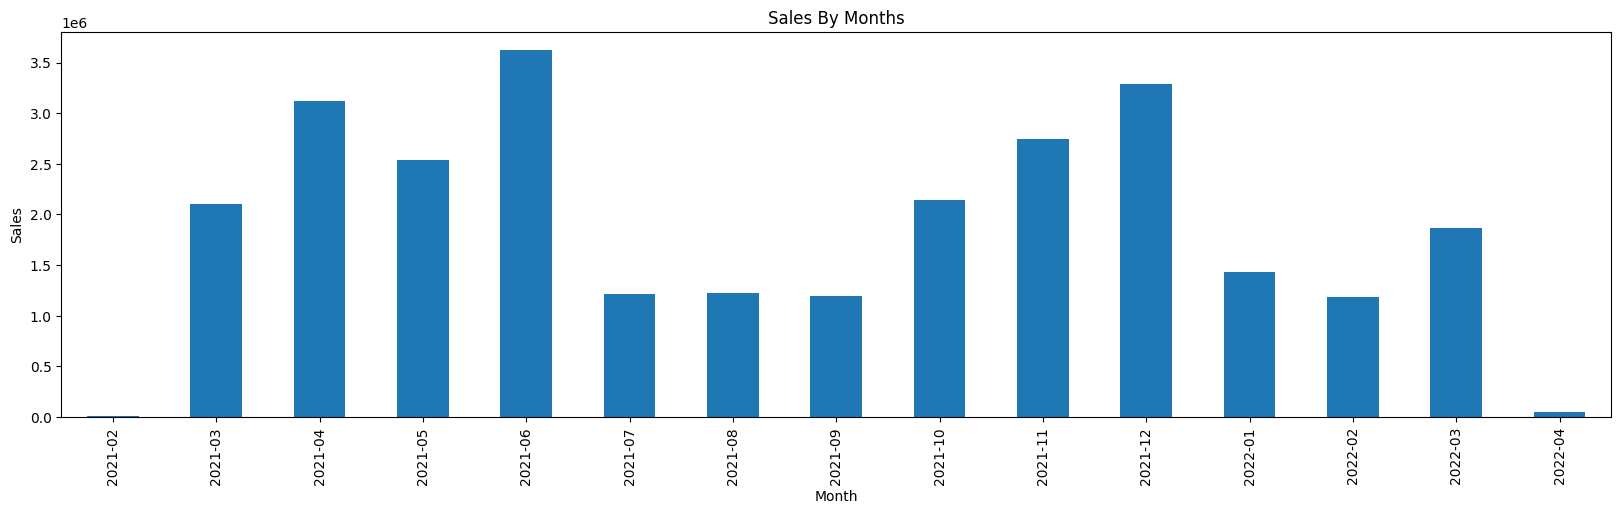

In [11]:
# 집계 결과를 시각화하기
plt.figure(figsize=(20,5))
ax = payment_data.plot(kind='bar')
plt.title('Sales By Months')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()


- 필수 문제2: 가장 인기 있는 음식/음료(salses_data를 이용합니다.)<br>
여러 메뉴들(음식,음료)을 판매 개수 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.<br>
힌트: value_counts() 함수를 사용하세요.<br>

In [12]:
# temp_var의 상품명을 value_counts를 이용해 집계하기
items_count = temp_var['상품명'].value_counts()
#items_count = temp_var['상품명'].value_counts(ascending=False)     ## 동일
#items_count = temp_var['상품명'].value_counts(ascending=True)      ## 오름차순
items_count

김치볶음밥           1211
라면               756
짜장라면             457
치즈불고기볶음밥         423
계란추가             315
                ... 
녹차(HOT)            1
짜장라면(계란추가)         1
이어폰(커널형)           1
오늘은 한돈고추장불고기       1
오늘은 한돈간장불고기        1
Name: 상품명, Length: 100, dtype: int64

In [20]:
# 집계 결과를 데이터프레임으로 변환하고, 상위 10개 선정하기
items_count = pd.DataFrame(items_count)
items_count[:10]

,상품명
김치볶음밥,1211
라면,756
짜장라면,457
치즈불고기볶음밥,423
계란추가,315
아메리카노(ICE),314
낙지볶음밥,314
새우볶음밥,311
치즈감자튀김,247
감자튀김,242


In [13]:
# 한글이 포함된 시각화를 위해 Matplotlib 설정
# [[YOUR CODE]]
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
## fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
##fontpath = "https://fonts.google.com/download?family=Nanum%20Gothic%20Coding"
fontpath = "/Windows/Fonts"
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='D2Coding') 
mpl.font_manager.findfont(font)
print("완료!")

완료!


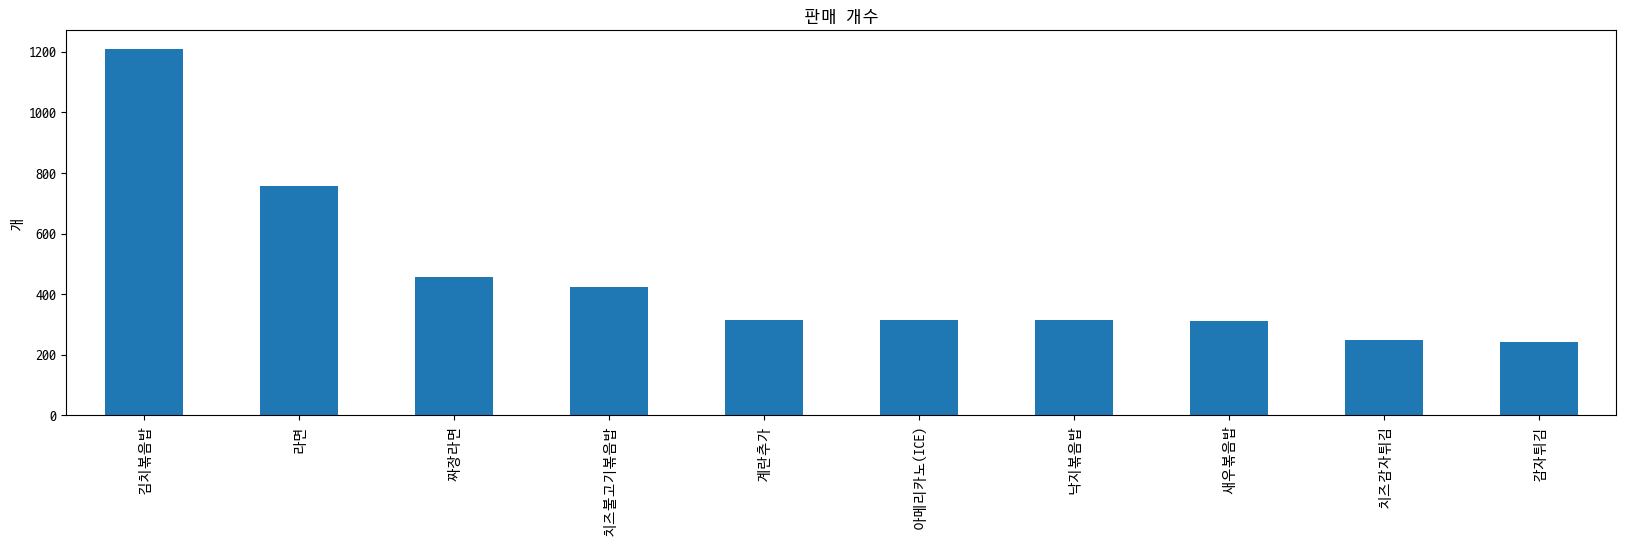

In [19]:
# 집계 결과를 시각화하기
plt.figure(figsize=(20,5))
items_count[:10].plot(kind='bar')
plt.ylabel('개')
plt.title('판매 개수')
plt.show()

여러 메뉴들(음식,음료)을 판매 매출(판매 개수 x 결제 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.<br>
힌트: value_counts() 함수를 사용하세요.

In [15]:
temp_var.head(20)

,결제일시,판매위치,상품명,결제방식,비고,판매수량,결제금액,고객,date,payment
0,2022-04-01 19:41,선불기1,치킨카라아케 6pc,신용카드,결제완료,1,"4,500",customer275507,2022-04,4500
1,2022-04-01 19:41,선불기1,짜장라면(계란추가),신용카드,결제완료,1,"5,500",customer275507,2022-04,5500
2,2022-04-01 19:41,선불기1,라면,신용카드,결제완료,1,"4,000",customer275507,2022-04,4000
3,2022-04-01 19:41,선불기1,비엔나소세지(토핑),신용카드,결제완료,1,"1,000",customer275507,2022-04,1000
4,2022-04-01 19:41,선불기1,라면(계란/치즈추가),신용카드,결제완료,1,"5,000",customer275507,2022-04,5000
5,2022-04-01 16:32,선불기1,라면,신용카드,결제완료,1,"4,000",customer977070,2022-04,4000
6,2022-04-01 16:32,선불기1,소떡소떡,신용카드,결제완료,1,"3,000",customer977070,2022-04,3000
7,2022-04-01 15:19,선불기1,아이스티,신용카드,결제완료,1,"3,900",customer630809,2022-04,3900
8,2022-04-01 13:01,선불기1,순살닭다리덮밥,신용카드,결제완료,1,"8,000",customer255068,2022-04,8000
9,2022-04-01 13:01,선불기1,만두라면,신용카드,결제완료,1,"5,000",customer255068,2022-04,5000


In [17]:
# temp_var의 payment열을 상품명을 기준으로 집계하기
# item_payment의 값을 내림차순으로 정렬하고 상위 10개 도출하기
items_payment = temp_var['payment'].groupby(temp_var['상품명']).sum().sort_values(ascending=False)
items_payment

상품명
김치볶음밥         5971900
라면            2916000
치즈불고기볶음밥      2276100
짜장라면          2032500
낙지볶음밥         1699700
               ...   
비엔나소세지(토핑)       3000
이어폰(커널형)         3000
시럽추가             2500
(밥)체다치즈추가        2000
2인라면              700
Name: payment, Length: 100, dtype: int32

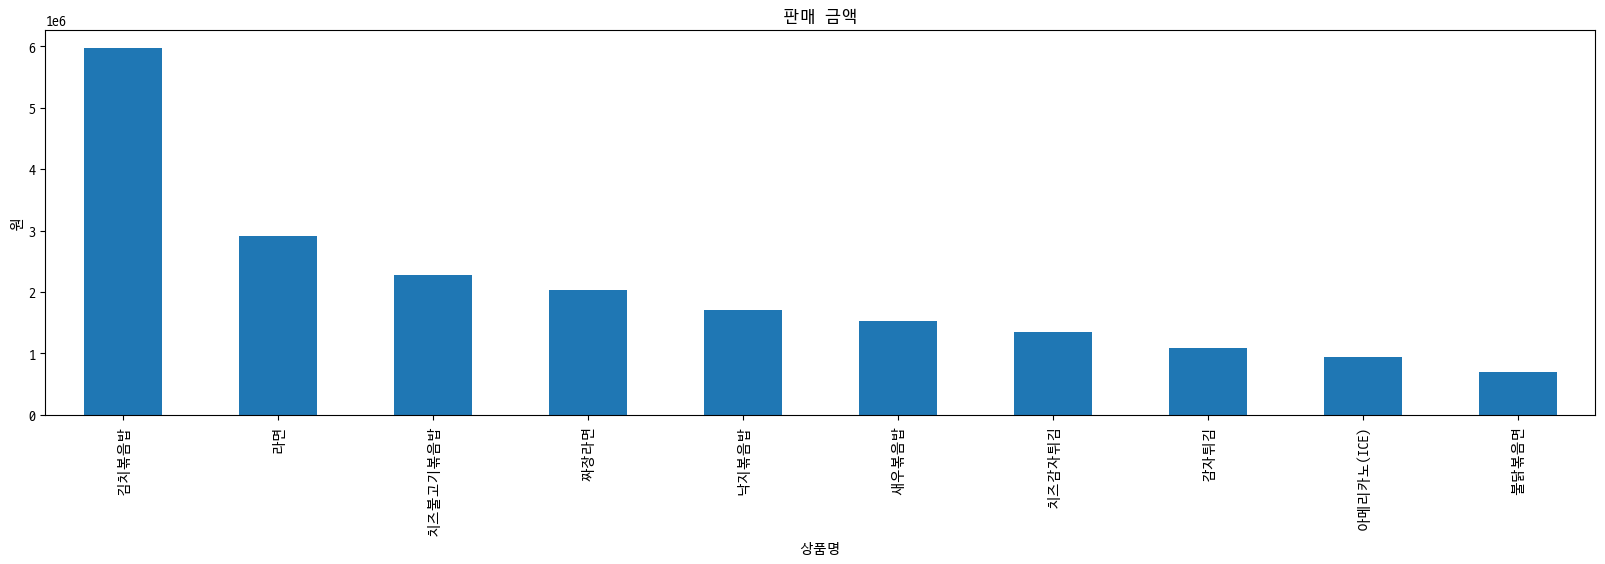

In [18]:
# 집계 결과를 시각화하기
plt.figure(figsize=(20,5))
items_payment[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('판매 금액')
plt.show()

- 필수 문제3: 가장 많이 팔린 입장권 종류(entry_data를 이용합니다.)<br>
여러 입장권 종류를 판매 매출(판매 개수 x 금액) 순으로 정렬하고 상위 10개를 뽑아 결과를 시각화해봅니다.<br>
힌트: value_counts() 함수를 사용하세요.<br>

In [21]:
# 활용할 데이터(entry_data)를 temp_var로 정의하기
temp_var = entry_data
temp_var

,요금제명,입실,퇴실,이용,위치,금액,구분,고객
0,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
1,시간요금제(1시간),2022-04-01 23:39,2022-04-02 0:39,오전 1:00:00,선불기2,3000,퇴실,customer263717
2,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
3,무제한 입장권,2022-04-01 20:55,2022-04-01 21:41,오전 12:46:00,선불기2,7400,퇴실,customer247263
4,한국대생 무제한 입장권,2022-04-01 19:54,2022-04-01 22:28,오전 2:33:00,선불기2,7400,퇴실,customer388928
...,...,...,...,...,...,...,...,...
22550,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22551,종일요금제,2021-02-17 13:09,2021-02-17 14:19,오전 1:10:00,선불기1,6500,퇴실,customer774105
22552,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105
22553,종일요금제,2021-02-17 13:06,2021-02-17 14:19,오전 1:13:00,선불기1,7000,퇴실,customer774105


In [23]:
# temp_var의 금액을 숫자형태로 변환하기
temp_var['금액'] = temp_var['금액'].astype(int)

In [28]:
# temp_var의 금액을 요금제명을 기준으로 집계하기
tickets = temp_var['금액'].groupby(temp_var['요금제명']).sum().sort_values(ascending=False)
tickets

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
종일요금제                233000
1시간                   90000
시간 요금제(1시간당)          25000
시간요금제(1시간당)           22500
3시간                   21000
무제한(한국대생)             14000
1시간 요금제               14000
시간요금제                 12300
무제한(일반요금)              6000
시간권                       0
기간권                       0
이용권                       0
Name: 금액, dtype: int32

In [29]:
# tickets의 값을 내림차순으로 정렬하고 상위 10개 도출하기
tickets = tickets.sort_values(ascending=False)
tickets[:10]

요금제명
한국대생 입장권(종일권)      70037000
입장권(종일권)           23570500
심야-조조무제한(06시까지)    11600000
심야-조조무제한            6221000
한국대생 무제한 입장권        5207500
시간요금제(1시간)          2665500
시간요금제(3시간)          2042000
무제한 입장권             1568600
18시이후 무제한           1330500
조조무제한                693000
Name: 금액, dtype: int32

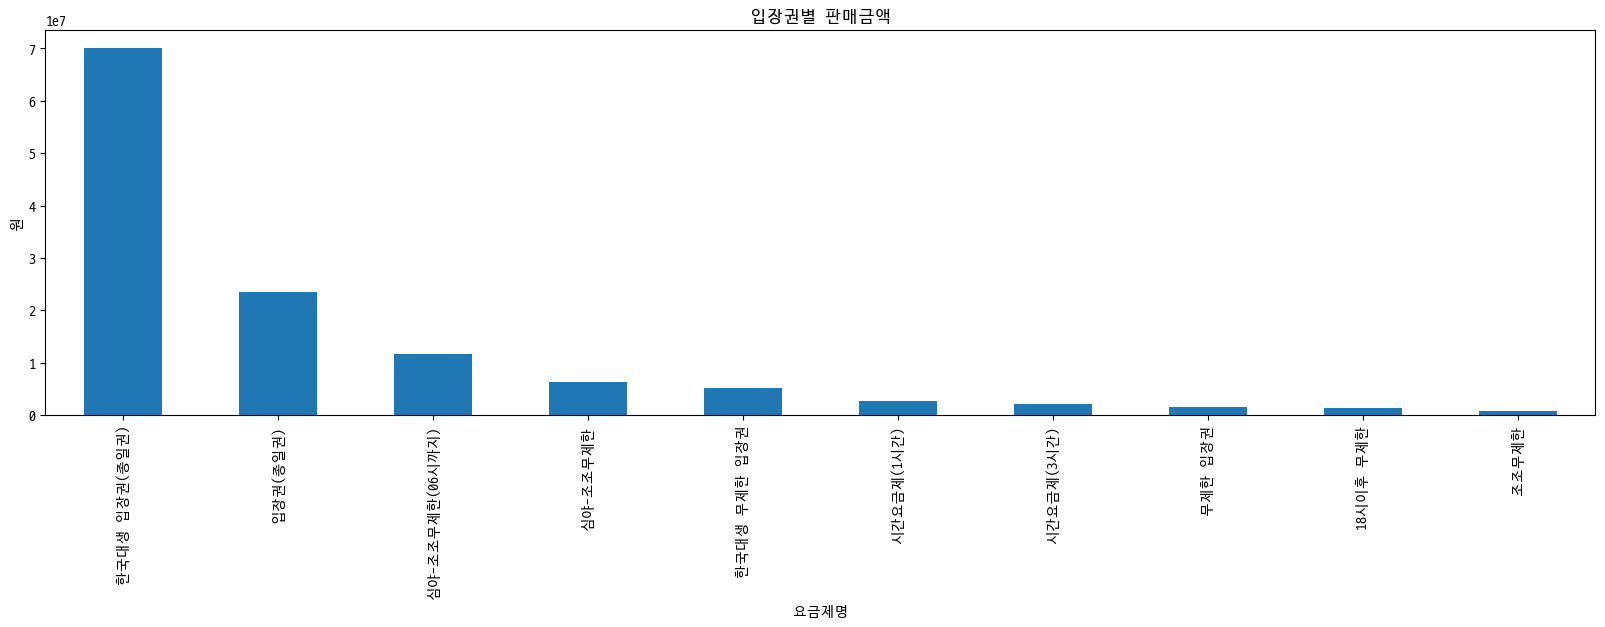

In [30]:
# 집계 결과 시각화하기
plt.figure(figsize=(20,5))
tickets[:10].plot(kind='bar')
plt.ylabel('원')
plt.title('입장권별 판매금액')
plt.show()

<hr>


각 정보를 통해 생각해 볼 수 있는 정보는 아래와 같다.

1. 입장권：한국대생이 주 고객층이다.

2. 시간별 음식／음료 판매 데이터：한국대의 학사일정에 영향을 많이 받는다.

3. 음식／음료 판매 데이터：음료보다는 식사류 위주의 매출을 볼 때, 주 고객층인 한국대생이 주로 식사를 하는 사례가 많을 것으로 짐작된다.

4. 입장권：한국대생 종일권에 너무 몰려있다. 다른 입장권대비 가격대비 효율이 너무 뛰어난것 같다. 음료를 끼워팔기 하고 가격을 올리면 괜찮을 것 같다.